In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("E:\\1 P36 PROJECT\\Original Datasets\\train (2).csv")

In [4]:
data.head(3)
data.tail(3)

ID                                             Review  Rating
0   0  exceptional service nice all-around daughter s...       5
1   1  beautiful relaxing jw marriott desert ridge re...       5
2   2  great location great location 5 mins subway ta...       5

ID                                             Review  Rating
14340  14340  great place relax know looking vacation book t...       4
14341  14341  better just got week seattle loved minute, pac...       3
14342  14342  stay clear, internet reservation friday rang h...       1

In [5]:
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords 

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatize the words

from nltk.tokenize import RegexpTokenizer, word_tokenize # to tokenize sentences into words

TEXT NORMALIZATION
converting all letters to lower case
removing numbers
removing punctuations, accent marks and other diacritics
removing white spaces
removing stop words, sparse terms, and particular words

In [6]:
# TEXT NORMALIZATION   or PRE-PROCESSING

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e','ca','nd','wo','el','etc']
stop_words = stop_words.union(new_words)

corpus = []
for index, row in data.iterrows():
    text = re.sub('[^a-zA-Z]', ' ', row['Review']) # Remove punctuations    
    text = text.lower() #Convert to lowercase
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)  # remove tags
    text = re.sub("(\\d|\\W)+"," ",text)  # remove special characters and digits
    text = text.split()  # Convert to list from string
    
    #Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word  in stop_words] 
    text_string = " ".join(text)
    data.at[index, 'clean_review'] = text_string
data[0:10]

ID                                             Review  Rating  \
0   0  exceptional service nice all-around daughter s...       5   
1   1  beautiful relaxing jw marriott desert ridge re...       5   
2   2  great location great location 5 mins subway ta...       5   
3   3  pleased nice safe hotel, flower market hotel v...       3   
4   4  excellent hotel service great hotel excellent ...       4   
5   5  beautiful beautiful beautiful, hotel just perf...       5   
6   6  not enought spend night business trip, 5 stars...       3   
7   7  great place, villa ixora good quiet location, ...       5   
8   8  march 14 28th 2007 wonderful relaxing vacation...       4   
9   9  fantastic value true gem stayed hotel husbands...       5   

                                        clean_review  
0  exceptional service nice around daughter staye...  
1  beautiful relaxing jw marriott desert ridge re...  
2  great location great location min subway take ...  
3  pleased nice safe flower market vast array mai...  
4  excellent service great excellent location cou...  
5  beautiful beautiful beautiful perfect thi perf...  
6  enought spend night business trip star buildin...  
7  great place villa ixora good quiet location wa...  
8  march wonderful relaxing vacation stayed catal...  
9  fantastic value true gem stayed husband birthd...

In [7]:
clean_review_list = " ".join(data['clean_review'])
clean_review_list = clean_review_list.split()
len(clean_review_list)
 # 13,33,314 words are present in cleaned reviews (includes duplicate words aswell)

1333314

In [8]:
# Calculating frequency of top 10 frequently occuring words

from collections import Counter

top_N=10
word_dist = nltk.FreqDist(clean_review_list)
freq_data_10 = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
freq_data_10

Word  Frequency
0     great      15197
1      good      12287
2     staff      11700
3      stay      10885
4     night      10326
5       day       9586
6      time       9208
7      nice       8837
8  location       8139
9   service       7697

In [9]:
sum(freq_data_10.Frequency) # 103862
# 103862/1333314= 0.077
# top 10 terms form about 8% of all terms

 

103862

In [10]:
# finding frequency of all words 
words_all=1333314
word_dist = nltk.FreqDist(clean_review_list)
freq_data_all = pd.DataFrame(word_dist.most_common(words_all), columns=['Word','Frequency'])

len(freq_data_all)
freq_data_all[0:10]

# we have 37,554 unique words  

37554

Word  Frequency
0     great      15197
1      good      12287
2     staff      11700
3      stay      10885
4     night      10326
5       day       9586
6      time       9208
7      nice       8837
8  location       8139
9   service       7697

In [11]:
freq_data_less_10 = freq_data_all[freq_data_all['Frequency'] <10]
print('There are',len(freq_data_less_10),'words with frequency <10 which is',round((30329 *100/37554),2),'% of total words') # 30329  words
print()
freq_data_more_equal_10 = freq_data_all[freq_data_all['Frequency'] >=10]
print('There are',len(freq_data_more_equal_10),'words with frequency >=10 which is',round((7225  *100/37554),2),'% of total words') # 7225 words


There are 30329 words with frequency <10 which is 80.76 % of total words

There are 7225 words with frequency >=10 which is 19.24 % of total words


In [12]:
print('There are ',len(freq_data_all), 'words in all')  # 37554  words
print()
print('There are ',len(freq_data_less_10), 'words with frequency  <10')  # 30329  words
print()
print('There are ',len(freq_data_more_equal_10), 'words with frequency >=10')  # 7225 words
print()

There are  37554 words in all

There are  30329 words with frequency  <10

There are  7225 words with frequency >=10



### Creating Term Frequency 
### Using default function values

In [13]:
# get clean-review text column as list
clean_review_list = data['clean_review'].tolist()
type(clean_review_list)
clean_review_list[0]

list

'exceptional service nice around daughter stayed well priced night king suite weekend night really impressed exceptionally welcoming service time reservation departure employee talked really friendly eager help question amazed day age l shaped pool tiny looked like fun kid hot tub exercise well breakfast abundant make waffle add scrambled egg bacon sausage fruit available bagel muffin oatmeal yogurt wanted morning sort long line waiting make waffle waiting scrambled egg picky really nice asked away freeway reading review earlier bit noisy hey city felt like deluxe considering reasonable price nice bedding art wall really liked space needle bit window shuttle run hourly reserve certain place certain time worked shuttle missed minute needed return space needle promptly paid cab fare asked definitely need stay near downtown seattle'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Running CountVectorizer function with all default values
cv_all = CountVectorizer()
X_all = cv_all.fit_transform(clean_review_list)


In [15]:
type(X_all)
X_all.shape
# there are 14343 rows/documents and 37530 terms have been generated
X_all.toarray()

scipy.sparse.csr.csr_matrix

(14343, 37530)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
X_all_names = cv_all.get_feature_names()
X_all_names # checked the starting words - many have freq<10, they are removed in subsequent steps

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaare',
 'aaah',
 'aaahhh',
 'aadvantage',
 'aahh',
 'aalders',
 'aand',
 'aany',
 'aaron',
 'aarp',
 'aarrgh',
 'aavacations',
 'ab',
 'abac',
 'aback',
 'abaited',
 'abalone',
 'abandon',
 'abandoned',
 'abandoning',
 'abba',
 'abbaye',
 'abbey',
 'abbott',
 'abbreviated',
 'abc',
 'abd',
 'abderahim',
 'abdication',
 'abdominal',
 'abdulaziz',
 'abe',
 'abeautiful',
 'abel',
 'aber',
 'abercrombie',
 'aberdeen',
 'abessess',
 'abetter',
 'abian',
 'abide',
 'abiding',
 'abigail',
 'ability',
 'abis',
 'abit',
 'ablast',
 'able',
 'abled',
 'ableto',
 'abnormal',
 'aboard',
 'abode',
 'aboit',
 'abolutely',
 'abondon',
 'abono',
 'aboot',
 'aboout',
 'aboput',
 'aboriginal',
 'aborted',
 'aboslutely',
 'abosolutely',
 'abosultely',
 'abot',
 'abottle',
 'abou',
 'abound',
 'abounded',
 'abounds',
 'abouot',
 'abour',
 'abouta',
 'aboutthe',
 'abraham',
 'abrahan',
 'abrasive',
 'abreast',
 'abroad',
 'abrupt',
 'abruptly',
 'ab

In [17]:
# first 10 words from vocabulary
list(cv_all.vocabulary_.keys())[:10]
# these are from the first review
clean_review_list[0]

['exceptional',
 'service',
 'nice',
 'around',
 'daughter',
 'stayed',
 'well',
 'priced',
 'night',
 'king']

'exceptional service nice around daughter stayed well priced night king suite weekend night really impressed exceptionally welcoming service time reservation departure employee talked really friendly eager help question amazed day age l shaped pool tiny looked like fun kid hot tub exercise well breakfast abundant make waffle add scrambled egg bacon sausage fruit available bagel muffin oatmeal yogurt wanted morning sort long line waiting make waffle waiting scrambled egg picky really nice asked away freeway reading review earlier bit noisy hey city felt like deluxe considering reasonable price nice bedding art wall really liked space needle bit window shuttle run hourly reserve certain place certain time worked shuttle missed minute needed return space needle promptly paid cab fare asked definitely need stay near downtown seattle'

In [ ]:
# add freq disbn codes 

### Creating Term frequency - binary

In [18]:
# As seen this also includes words which appear only a few times in the whole corpus
# let us have words which appear atleast 10 times in the corpus

In [58]:
cv_binary = CountVectorizer(min_df=10,binary=True)
# terms appearing less than 10 times are removed and using binary (o or 1) frequency
X_bin = cv_binary.fit_transform(clean_review_list).toarray()

X_bin_names = cv_binary.get_feature_names()
X_bin_names[:5]

X_bin.shape # there are 14343 rows/documents and 6885 terms have been generated
X_bin[:3,]

# create dataframe
X_bin_vector = pd.DataFrame(X_bin, columns=X_bin_names)

['aaa', 'ab', 'abandoned', 'abc', 'ability']

(14343, 6885)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
X_bin_vector[:3]
X_bin_vector.loc[:10, ['great','good']]

aaa  ab  abandoned  abc  ability  abit  able  abroad  absence  absolut  \
0    0   0          0    0        0     0     0       0        0        0   
1    0   0          0    0        0     0     0       0        0        0   
2    0   0          0    0        0     0     0       0        0        0   

   ...  yummy  yunque  zealand  zen  zero  zip  zocalo  zona  zone  zoo  
0  ...      0       0        0    0     0    0       0     0     0    0  
1  ...      0       0        0    0     0    0       0     0     0    0  
2  ...      0       0        0    0     0    0       0     0     0    0  

[3 rows x 6885 columns]

great  good
0       0     0
1       1     0
2       1     1
3       0     0
4       1     0
5       0     0
6       0     0
7       1     1
8       1     1
9       1     0
10      1     1

In [60]:
X_bin_sum= X_bin_vector[X_bin_names].sum(axis=0)
type(X_bin_sum)
top_terms_tf_bin=X_bin_sum.sort_values(ascending=False)
top_terms_tf_bin[:10]

pandas.core.series.Series

staff        8263
great        7821
stay         7160
good         6573
night        6410
stayed       6055
location     5977
clean        5456
breakfast    5348
time         5233
dtype: int64

In [61]:
8263/14343 # the term 'STAFF' appears in 8263 out of 14343 reviews (about 58%)
7821/14343 # the term 'GREAT' appears in 7821 out of 14343 reviews (about 55%)
7160/14343 # the term 'GREAT' appears in 7160 out of 14343 reviews (about 50%)

# the highest occurence of a term is 58% - hence we will not remove terms with higher freq

0.5760998396430315

0.5452834135118176

0.49919821515721957

### Creating Dependant variable - y

In [80]:
y = data.Rating
type(y)
y[:10]
y.size # 14343 reviews

pandas.core.series.Series

0    5
1    5
2    5
3    3
4    4
5    5
6    3
7    5
8    4
9    5
Name: Rating, dtype: int64

14343

### Logistic regression on term freq-binary and min_df=10

In [64]:
# Splitting dataset in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_bin,X_test_bin,y_train_bin,y_test_bin = train_test_split(X_bin_vector,y,test_size=0.30,random_state=123,stratify=y)

In [77]:
### Multinomial Logistic Regression on tf - binary using 70% train dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix

model_log_bin = LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg')
model_log_bin.fit(X_train_bin,y_train_bin)

y_pred_train = model_log_bin.predict(X_train_bin)
y_pred_test = model_log_bin.predict(X_test_bin)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Evaluating test dat
print('Accuracy score of test data is',accuracy_score(y_test_bin,y_pred_test))
print()
print(classification_report(y_test_bin,y_pred_test))
print()
cm=confusion_matrix(y_test_bin,y_pred_test)
print(cm)

Accuracy score of test data is 0.5540320706483849

              precision    recall  f1-score   support

           1       0.63      0.57      0.60       293
           2       0.39      0.34      0.36       374
           3       0.34      0.31      0.32       453
           4       0.44      0.44      0.44      1252
           5       0.69      0.72      0.70      1931

    accuracy                           0.55      4303
   macro avg       0.50      0.48      0.49      4303
weighted avg       0.55      0.55      0.55      4303


[[ 166   81   28   10    8]
 [  73  129   81   61   30]
 [  15   69  140  170   59]
 [   4   43  115  553  537]
 [   4   12   46  473 1396]]


In [79]:
# Evaluating train dat
print('Accuracy score of train data is',accuracy_score(y_train_bin,y_pred_train))
print()
print(classification_report(y_train_bin,y_pred_train))
print(confusion_matrix(y_train_bin,y_pred_train))

Accuracy score of train data is 0.972211155378486

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       684
           2       1.00      1.00      1.00       874
           3       1.00      0.98      0.99      1057
           4       0.96      0.94      0.95      2920
           5       0.96      0.98      0.97      4505

    accuracy                           0.97     10040
   macro avg       0.98      0.98      0.98     10040
weighted avg       0.97      0.97      0.97     10040

[[ 684    0    0    0    0]
 [   0  872    0    1    1]
 [   0    1 1037   14    5]
 [   0    0    3 2755  162]
 [   0    0    1   91 4413]]


In [ ]:
# we find that training accuracy is quite high-97% and sensitivity is also very high for all ratings
# we find that testing accuracy is about 55% and sensitivity for ratings is also low 

### Creating Term frequencies

In [87]:
cv_tf = CountVectorizer(min_df=10)
# terms appearing less than 10 times are removed and we are using freq of all terms
X_tf = cv_tf.fit_transform(clean_review_list).toarray()

type(X_tf)

X_tf_names = cv_tf.get_feature_names()
X_tf_names[:7] # checked the words - aaa, ab, abc - they are used meaningfully here, hence not removed

X_tf.shape # there are 14343 rows/documents and 6885 terms have been generated

# create dataframe
X_tf_vector = pd.DataFrame(X_tf, columns=X_tf_names)

numpy.ndarray

['aaa', 'ab', 'abandoned', 'abc', 'ability', 'abit', 'able']

(14343, 6885)

In [88]:
X_tf_vector.head(3)

X_tf_vector.loc[:10, ['great','good']]

aaa  ab  abandoned  abc  ability  abit  able  abroad  absence  absolut  \
0    0   0          0    0        0     0     0       0        0        0   
1    0   0          0    0        0     0     0       0        0        0   
2    0   0          0    0        0     0     0       0        0        0   

   ...  yummy  yunque  zealand  zen  zero  zip  zocalo  zona  zone  zoo  
0  ...      0       0        0    0     0    0       0     0     0    0  
1  ...      0       0        0    0     0    0       0     0     0    0  
2  ...      0       0        0    0     0    0       0     0     0    0  

[3 rows x 6885 columns]

great  good
0       0     0
1       2     0
2       2     2
3       0     0
4       1     0
5       0     0
6       0     0
7       1     3
8       2     1
9       1     0
10      3     1

In [89]:
# Sorting frequencies of all tems and finding top-N and bottom-N terms
X_tf_sum= X_tf_vector[X_tf_names].sum(axis=0)

top_terms_tf=X_tf_sum.sort_values(ascending=False)
top_terms_tf[:10]
top_terms_tf[-10:]
# we have seen that the word 'great' is present in about 7,800 reviews but its total freq throughout the corpus is 15,200

great       15197
good        12287
staff       11700
stay        10885
night       10326
day          9586
time         9208
nice         8837
location     8139
service      7697
dtype: int64

discrete      10
scone         10
supportive    10
supreme       10
disregard     10
supremely     10
hubbub        10
hottest       10
doorbell      10
concoction    10
dtype: int64

### Splitting the dataset 80:20
#### Also using stratify to maintain same proportion of ratings in original, train and test data

In [85]:
from sklearn.model_selection import train_test_split
# using X10_tf_vector data where min_df=10, terms present in less than 10 reviews will be removed
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_tf_vector,y,test_size=0.20,random_state=123,stratify=y)

In [86]:
y_train1.value_counts(normalize=True)*100
y_test1.value_counts(normalize=True)*100
y.value_counts(normalize=True)*100
# we have similar proportions of Ratings in original data, training and testing data

5    44.875370
4    29.083145
3    10.528151
2     8.697926
1     6.815409
Name: Rating, dtype: float64

5    44.858836
4    29.104217
3    10.526316
2     8.713838
1     6.796793
Name: Rating, dtype: float64

5    44.872063
4    29.087360
3    10.527784
2     8.701109
1     6.811685
Name: Rating, dtype: float64

### Multinomial Logistic Regression

In [91]:
# Running log reg model on term freq with min_df=10
model_log = LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg')
model_log.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
y_pred_test = model_log.predict(X_test1)

y_test1[:10,]
y_pred_test[:10,]
# in a few rows itslef, we can find difference in ratings original vs prediction

10255    4
6086     4
1755     4
4088     5
9759     5
1797     5
10775    5
7443     5
9618     5
1295     4
Name: Rating, dtype: int64

array([5, 5, 4, 5, 5, 5, 4, 4, 5, 5], dtype=int64)

In [95]:
# for test data 
accuracy_score(y_test1,y_pred_test)
print(classification_report(y_test1,y_pred_test))

print(confusion_matrix(y_test1,y_pred_test))

0.5681422098292088

              precision    recall  f1-score   support

           1       0.62      0.65      0.63       195
           2       0.40      0.36      0.38       250
           3       0.35      0.30      0.32       302
           4       0.45      0.46      0.45       835
           5       0.70      0.73      0.72      1287

    accuracy                           0.57      2869
   macro avg       0.51      0.50      0.50      2869
weighted avg       0.56      0.57      0.56      2869

[[126  44  15   5   5]
 [ 56  90  50  36  18]
 [ 13  53  91 106  39]
 [  5  29  81 381 339]
 [  3   9  21 312 942]]


In [96]:
# for training data
y_pred_train = model_log.predict(X_train1)

accuracy_score(y_train1,y_pred_train)
print(classification_report(y_train1,y_pred_train))

print(confusion_matrix(y_train1,y_pred_train))

0.9667073383301377

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       782
           2       1.00      1.00      1.00       998
           3       0.99      0.98      0.99      1208
           4       0.96      0.93      0.94      3337
           5       0.96      0.98      0.97      5149

    accuracy                           0.97     11474
   macro avg       0.98      0.98      0.98     11474
weighted avg       0.97      0.97      0.97     11474

[[ 782    0    0    0    0]
 [   0  996    1    1    0]
 [   0    2 1181   19    6]
 [   0    0    3 3111  223]
 [   0    0    3  124 5022]]


In [ ]:
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; hence tried all these
# but got results only for ‘newton-cg’. Others (‘sag’, ‘saga’ and ‘lbfgs’) model did not converge

In [76]:
model_log1 = LogisticRegression(random_state=123, multi_class='multinomial',solver='saga')
model_log1.fit(X_train1,y_train1)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
model_log2 = LogisticRegression(random_state=123, multi_class='multinomial',solver='sag')
model_log2.fit(X_train1,y_train1)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
model_log3 = LogisticRegression(random_state=123, multi_class='multinomial',solver='lbfgs')
model_log3.fit(X_train1,y_train1)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Cross validation

In [78]:
# evaluate model using 10-fold cross validatation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg'),X_train1,y_train1,scoring='accuracy', cv=10)
print(scores)
scores.mean()
# [0.57578397 0.57055749 0.57665505 0.57665505 0.57192677 0.56669573
# 0.56408021 0.56669573 0.57890148 0.57367044]
#  mean accuracy score is 0.5721621925398479

[0.57578397 0.57055749 0.57665505 0.57665505 0.57192677 0.56669573
 0.56408021 0.56669573 0.57890148 0.57367044]


0.5721621925398479

### Creating TF-IDF using min_df=10

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter1 = TfidfVectorizer(min_df=10)
X_tfidf1 = tfidfconverter1.fit_transform(clean_review_list).toarray()

In [103]:
X_tfidf_names1 = tfidfconverter1.get_feature_names()
X_tfidf_names1[:10]

['aaa',
 'ab',
 'abandoned',
 'abc',
 'ability',
 'abit',
 'able',
 'abroad',
 'absence',
 'absolut']

In [99]:
X_tfidf1.shape # there are 14343 rows/documents and 6885 terms have been generated

# create dataframe
X_tfidf_vector1 = pd.DataFrame(X_tfidf1, columns=X_tfidf1_names)
X_tfidf_vector1[:2]

(14343, 6885)

aaa   ab  abandoned  abc  ability  abit  able  abroad  absence  absolut  \
0  0.0  0.0        0.0  0.0      0.0   0.0   0.0     0.0      0.0      0.0   
1  0.0  0.0        0.0  0.0      0.0   0.0   0.0     0.0      0.0      0.0   

   ...  yummy  yunque  zealand  zen  zero  zip  zocalo  zona  zone  zoo  
0  ...    0.0     0.0      0.0  0.0   0.0  0.0     0.0   0.0   0.0  0.0  
1  ...    0.0     0.0      0.0  0.0   0.0  0.0     0.0   0.0   0.0  0.0  

[2 rows x 6885 columns]

In [104]:
X_tfidf_sum1= X_tfidf_vector1[X_tfidf1_names].sum(axis=0)
top_terms_tfidf1=X_tfidf_sum1.sort_values(ascending=False)
top_terms_tfidf1[:20]

great        627.316495
good         497.152304
stay         472.108500
staff        462.022353
location     448.135846
nice         415.033867
night        412.770920
time         357.859886
stayed       356.968645
day          353.984503
clean        352.361930
breakfast    347.748717
service      347.520667
place        333.819438
beach        311.932398
excellent    292.190998
resort       288.856793
friendly     286.049217
bed          284.575011
food         284.283128
dtype: float64

In [105]:
# Splitting the tfidf data into 80:20, 75:25 and 70:30 ratios of train and test data
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_tfidf_vector1,y,test_size=0.20,random_state=123,stratify=y)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_tfidf_vector1,y,test_size=0.25,random_state=123,stratify=y)
X_train4,X_test4,y_train4,y_test4 = train_test_split(X_tfidf_vector1,y,test_size=0.30,random_state=123,stratify=y)

### Multinomial Logistic Regression

In [106]:
### Multinomial Logistic Regression on tfidf using 80% train dataset
model_log2 = LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg')
model_log2.fit(X_train2,y_train2)

y_pred2 = model_log2.predict(X_test2)
y_pred2[:10]
y_test2[:10]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

array([5, 4, 4, 5, 5, 5, 5, 4, 5, 5], dtype=int64)

10255    4
6086     4
1755     4
4088     5
9759     5
1797     5
10775    5
7443     5
9618     5
1295     4
Name: Rating, dtype: int64

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test2,y_pred2)
print(classification_report(y_test2,y_pred2))
print(confusion_matrix(y_test2,y_pred2))

0.612757058208435

              precision    recall  f1-score   support

           1       0.68      0.60      0.64       195
           2       0.48      0.38      0.42       250
           3       0.50      0.20      0.29       302
           4       0.50      0.49      0.49       835
           5       0.69      0.84      0.76      1287

    accuracy                           0.61      2869
   macro avg       0.57      0.50      0.52      2869
weighted avg       0.60      0.61      0.59      2869

[[ 117   54    7    8    9]
 [  45   94   27   51   33]
 [   7   33   60  150   52]
 [   3   10   25  408  389]
 [   1    3    0  204 1079]]


In [129]:
y_pred_train2 = model_log2.predict(X_train2)

print(classification_report(y_train2,y_pred_train2))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86       782
           2       0.82      0.67      0.74       998
           3       0.83      0.48      0.61      1208
           4       0.69      0.68      0.69      3337
           5       0.78      0.91      0.84      5149

    accuracy                           0.77     11474
   macro avg       0.81      0.71      0.75     11474
weighted avg       0.77      0.77      0.77     11474



In [111]:
### Multinomial Logistic Regression on tfidf using 75% train dataset

model_log2.fit(X_train3,y_train3)

y_pred = model_log2.predict(X_test3)

accuracy_score(y_test3,y_pred)
print(classification_report(y_test3,y_pred))
print(confusion_matrix(y_test3,y_pred))
# 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

0.6098717233686559

              precision    recall  f1-score   support

           1       0.68      0.58      0.63       244
           2       0.48      0.37      0.42       312
           3       0.46      0.21      0.28       378
           4       0.49      0.49      0.49      1043
           5       0.69      0.84      0.76      1609

    accuracy                           0.61      3586
   macro avg       0.56      0.50      0.52      3586
weighted avg       0.59      0.61      0.59      3586

[[ 141   68   14   10   11]
 [  53  115   41   61   42]
 [   9   38   78  191   62]
 [   3   14   36  507  483]
 [   0    4    2  257 1346]]


In [113]:
### Multinomial Logistic Regression on tfidf using 70% train dataset

model_log2.fit(X_train4,y_train4)

y_pred = model_log2.predict(X_test4)

accuracy_score(y_test4,y_pred)
print(classification_report(y_test4,y_pred))
print(confusion_matrix(y_test4,y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

0.6091099233093191

              precision    recall  f1-score   support

           1       0.70      0.59      0.64       293
           2       0.47      0.34      0.40       374
           3       0.44      0.19      0.27       453
           4       0.49      0.49      0.49      1252
           5       0.69      0.84      0.76      1931

    accuracy                           0.61      4303
   macro avg       0.56      0.49      0.51      4303
weighted avg       0.59      0.61      0.59      4303

[[ 173   77   16   14   13]
 [  61  129   51   82   51]
 [   7   48   88  237   73]
 [   5   15   41  618  573]
 [   0    5    2  311 1613]]


### KNN

In [114]:
# KNN on tfidf using 70% train dataset and n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train4,y_train4)

y_pred = model_knn.predict(X_test4)

accuracy_score(y_test4,y_pred)
print(classification_report(y_test4,y_pred))
print(confusion_matrix(y_test4,y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.488264001859168

              precision    recall  f1-score   support

           1       0.51      0.39      0.44       293
           2       0.31      0.17      0.22       374
           3       0.23      0.16      0.19       453
           4       0.38      0.42      0.40      1252
           5       0.61      0.69      0.65      1931

    accuracy                           0.49      4303
   macro avg       0.41      0.36      0.38      4303
weighted avg       0.47      0.49      0.47      4303

[[ 115   43   32   51   52]
 [  57   62   43  122   90]
 [  18   41   71  181  142]
 [  26   27  101  525  573]
 [  11   28   58  506 1328]]


In [115]:
# KNN on tfidf using 70% train dataset and n_neighbors=11
from sklearn.neighbors import KNeighborsClassifier
model_knn2 = KNeighborsClassifier(n_neighbors=11)
model_knn2.fit(X_train4,y_train4)

y_pred = model_knn2.predict(X_test4)

accuracy_score(y_test4,y_pred)
print(classification_report(y_test4,y_pred))
print(confusion_matrix(y_test4,y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

0.5103416221240995

              precision    recall  f1-score   support

           1       0.62      0.39      0.48       293
           2       0.31      0.13      0.18       374
           3       0.31      0.12      0.18       453
           4       0.39      0.41      0.40      1252
           5       0.60      0.76      0.67      1931

    accuracy                           0.51      4303
   macro avg       0.45      0.36      0.38      4303
weighted avg       0.48      0.51      0.48      4303

[[ 113   45   17   57   61]
 [  46   48   43  133  104]
 [  11   26   55  194  167]
 [   9   20   42  519  662]
 [   3   14   18  435 1461]]


In [116]:
# Dont run takes very long time
# train accuracy
train_acc = np.mean(model_knn2.predict(X_train4) == y_train4) 
train_acc # 0.5961
# test accuracy
test_acc = np.mean(model_knn2.predict(X_test4) == y_test4) 
test_acc  # 0.5103
# we see that even train accuracyis very less when we have given n_neighbors=11

In [117]:
train_acc # 0.5961
test_acc  # 0.5103
# we see that even train accuracyis very less when we have given n_neighbors=11

0.5961155378486056

0.5103416221240995

In [ ]:
''' 
####### Running the model for various values of k
accuracy = []

for i in range(1,50,1):
    knn = KNC(n_neighbors =i)
    knn.fit(X_train4,y_train4)
    train_acc = np.mean(knn.predict(X_train4) == y_train4)
    test_acc = np.mean(knn.predict(X_test4) == y_test4)
    accuracy.append([train_acc, test_acc])
    
# Plotting the accuracies
plt.plot(np.arange(1,50,1), [i[0] for i in accuracy], "bo-")
plt.plot(np.arange(1,50,1), [i[1] for i in accuracy], "ro-")
plt.legend(['train_accuracy','test_accuracy'])
'''


In [ ]:
'''
for k=1, we have test and train accuracy as 100%, but if choose smaller k
value, noise will impact the result. small changes in training set, will cause
large changes in classification. 
hence we are using training set to run the model and validation set to
validate our results. 
(If take higher values of k, will lead to high model bias by predicting the
most frequent class.)
'''

### Naive Bayes - Gaussian and Multinomial

### Gaussian Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train4,y_train4)
y_pred_test = model_gnb.predict(X_test4)
# y_pred_test = model_gnb.fit(X_train4,y_train4).predict(X_test4)

# test data accuracy
accuracy_score(y_test4,y_pred_test)
print(classification_report(y_test4,y_pred_test))
print(confusion_matrix(y_test4,y_pred_test))

# train data accuracy
y_pred_train = model_gnb.predict(X_train4)
print(classification_report(y_train4,y_pred_train))

# least testing accuracy , just 29%

# training accuracy is 54% 

GaussianNB(priors=None, var_smoothing=1e-09)

0.28886823146641877

              precision    recall  f1-score   support

           1       0.14      0.27      0.18       293
           2       0.11      0.22      0.15       374
           3       0.12      0.23      0.16       453
           4       0.31      0.25      0.28      1252
           5       0.60      0.34      0.44      1931

    accuracy                           0.29      4303
   macro avg       0.26      0.26      0.24      4303
weighted avg       0.39      0.29      0.32      4303

[[ 79  75  35  84  20]
 [ 71  82  46 110  65]
 [ 74  83 102 119  75]
 [153 222 286 319 272]
 [201 270 393 406 661]]
              precision    recall  f1-score   support

           1       0.36      1.00      0.53       684
           2       0.38      0.81      0.51       874
           3       0.33      0.77      0.47      1057
           4       0.75      0.44      0.55      2920
           5       0.93      0.43      0.59      4505

    accuracy                           0.54     10040
   macro avg   

In [122]:
X_train4.shape # 10040 data points
X_test4.shape # 4303 data points
print("Number of mislabelled points out of a total %d points : %d" % (X_test4.shape[0], (y_test4 != y_pred_test).sum()))
3060/4303 # about 71% of data points mislabelled

(10040, 6885)

(4303, 6885)

Number of mislabelled points out of a total 4303 points : 3060


0.7111317685335812

### Multinomial Naive Bayes

In [124]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
model_mnb.fit(X_train4,y_train4)

y_pred_test = model_mnb.predict(X_test4)

# test data accuracy
accuracy_score(y_test4,y_pred_test)
print(classification_report(y_test4,y_pred_test))
print(confusion_matrix(y_test4,y_pred_test))

# train data accuracy
y_pred_train = model_mnb.predict(X_train4)
print(classification_report(y_train4,y_pred_train))


# testing accuracy is 52%, rating-3 none have been classified correctly

# training accuracy is 59% 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.5152219381826633

              precision    recall  f1-score   support

           1       0.89      0.16      0.27       293
           2       0.38      0.05      0.09       374
           3       0.25      0.00      0.00       453
           4       0.32      0.26      0.29      1252
           5       0.58      0.94      0.72      1931

    accuracy                           0.52      4303
   macro avg       0.48      0.28      0.27      4303
weighted avg       0.47      0.52      0.43      4303

[[  47   29    1  130   86]
 [   5   20    2  207  140]
 [   1    2    1  255  194]
 [   0    2    0  326  924]
 [   0    0    0  108 1823]]
              precision    recall  f1-score   support

           1       0.96      0.34      0.50       684
           2       0.75      0.14      0.23       874
           3       0.88      0.01      0.03      1057
           4       0.46      0.40      0.42      2920
           5       0.62      0.97      0.75      4505

    accuracy                           0.59 

### Support Vector Machines

In [114]:
# takes time to run (10-30mins)
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train4,y_train4)

y_pred = model_svm.predict(X_test4)

accuracy_score(y_test4,y_pred)
print(metrics.classification_report(y_test4,y_pred))
print(confusion_matrix(y_test4,y_pred))


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.6165465953985592

              precision    recall  f1-score   support

           1       0.73      0.53      0.61       293
           2       0.46      0.43      0.44       374
           3       0.51      0.14      0.22       453
           4       0.49      0.52      0.50      1252
           5       0.70      0.85      0.77      1931

    accuracy                           0.62      4303
   macro avg       0.58      0.49      0.51      4303
weighted avg       0.60      0.62      0.59      4303

[[ 154  100    6   22   11]
 [  48  159   32   88   47]
 [   6   62   62  262   61]
 [   3   17   20  646  566]
 [   0    4    1  294 1632]]


In [169]:
# takes time to run (10-30mins)
from sklearn.svm import LinearSVC
model_lin_svm = LinearSVC(random_state=123)
model_lin_svm.fit(X_train4,y_train4)

y_pred_test = model_lin_svm.predict(X_test4)

accuracy_score(y_test4,y_pred)
print(classification_report(y_test4,y_pred))
print(confusion_matrix(y_test4,y_pred))

y_pred_train = model_lin_svm.predict(X_train4)
print(classification_report(y_train4,y_pred_train))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=0)

0.5103416221240995

              precision    recall  f1-score   support

           1       0.62      0.39      0.48       293
           2       0.31      0.13      0.18       374
           3       0.31      0.12      0.18       453
           4       0.39      0.41      0.40      1252
           5       0.60      0.76      0.67      1931

    accuracy                           0.51      4303
   macro avg       0.45      0.36      0.38      4303
weighted avg       0.48      0.51      0.48      4303

[[ 113   45   17   57   61]
 [  46   48   43  133  104]
 [  11   26   55  194  167]
 [   9   20   42  519  662]
 [   3   14   18  435 1461]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       684
           2       0.99      0.97      0.98       874
           3       0.98      0.88      0.93      1057
           4       0.89      0.84      0.87      2920
           5       0.90      0.95      0.93      4505

    accuracy                           0.92 

### Creating TF-IDF using min_df=10, max_df=0.7

In [121]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter2 = TfidfVectorizer(min_df=10,  max_df=0.7)
X_tfidf2 = tfidfconverter2.fit_transform(clean_review_list).toarray()



In [122]:
X_tfidf2_names = tfidfconverter2.get_feature_names()
X_tfidf2_names[:10]

X_tfidf2.shape 
X_tfidf2[:3,]
# there are 14343 rows/documents and 6885 terms have been generated - no change 

['aaa',
 'ab',
 'abandoned',
 'abc',
 'ability',
 'abit',
 'able',
 'abroad',
 'absence',
 'absolut']

(14343, 6885)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Creating TF-IDF using min_df=10,max_features=4000

In [138]:
tfidfconverter3 = TfidfVectorizer(min_df=10, max_features=4000)
X_tfidf3 = tfidfconverter3.fit_transform(clean_review_list).toarray()

X_tfidf3_names = tfidfconverter3.get_feature_names()

X_tfidf3.shape # there are 14343 rows/documents and 4000 terms have been generated

# create dataframe
X_tfidf_vector3 = pd.DataFrame(X_tfidf3, columns=X_tfidf3_names)

# split dataset 70-30 with TF-IDF using min_df=10, max_features=4000
X_train6,X_test6,y_train6,y_test6 = train_test_split(X_tfidf_vector3,y,test_size=0.20,random_state=123,stratify=y)

(14343, 4000)

In [139]:
### Multinomial Logistic Regression on tfidf using 70% train dataset - min_df=10, max_features=4000
model_log_trial = LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg')
model_log_trial.fit(X_train6,y_train6)

y_pred = model_log_trial.predict(X_test6)

accuracy_score(y_test6,y_pred)
print(metrics.classification_report(y_test6,y_pred))
print(confusion_matrix(y_test6,y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

0.6134541652143604

              precision    recall  f1-score   support

           1       0.67      0.61      0.64       195
           2       0.49      0.38      0.43       250
           3       0.47      0.20      0.28       302
           4       0.50      0.49      0.50       835
           5       0.69      0.84      0.76      1287

    accuracy                           0.61      2869
   macro avg       0.57      0.50      0.52      2869
weighted avg       0.59      0.61      0.59      2869

[[ 119   50    9    8    9]
 [  44   94   32   50   30]
 [  10   33   61  149   49]
 [   3   11   26  411  384]
 [   2    3    1  206 1075]]


### Creating TF-IDF using min_df=10,max_features=5000

In [125]:
tfidfconverter3 = TfidfVectorizer(min_df=10, max_features=5000)
X_tfidf3 = tfidfconverter3.fit_transform(clean_review_list).toarray()

X_tfidf3_names = tfidfconverter3.get_feature_names()

X_tfidf3.shape # there are 14343 rows/documents and 4000 terms have been generated

# create dataframe
X_tfidf_vector3 = pd.DataFrame(X_tfidf3, columns=X_tfidf3_names)

# split dataset 70-30 with TF-IDF using min_df=10, max_features=4000
X_train6,X_test6,y_train6,y_test6 = train_test_split(X_tfidf_vector3,y,test_size=0.20,random_state=123,stratify=y)

(14343, 5000)

In [126]:
### Multinomial Logistic Regression on tfidf using 70% train dataset - min_df=10, max_features=5000
model_log_trial = LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg')
model_log_trial.fit(X_train6,y_train6)

y_pred_test = model_log_trial.predict(X_test6)

accuracy_score(y_test6,y_pred_test)
print(classification_report(y_test6,y_pred_test))
print(confusion_matrix(y_test6,y_pred_test))

# train accuracy
y_pred_train = model_log_trial.predict(X_train6)
print(classification_report(y_train6,y_pred_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

0.6141512722202858

              precision    recall  f1-score   support

           1       0.67      0.59      0.63       195
           2       0.49      0.38      0.43       250
           3       0.49      0.21      0.29       302
           4       0.50      0.49      0.50       835
           5       0.69      0.84      0.76      1287

    accuracy                           0.61      2869
   macro avg       0.57      0.50      0.52      2869
weighted avg       0.60      0.61      0.60      2869

[[ 116   54    8    8    9]
 [  44   96   30   50   30]
 [   9   32   63  147   51]
 [   3   10   26  409  387]
 [   2    3    1  203 1078]]
              precision    recall  f1-score   support

           1       0.90      0.86      0.88       782
           2       0.84      0.70      0.77       998
           3       0.83      0.49      0.61      1208
           4       0.71      0.69      0.70      3337
           5       0.79      0.91      0.85      5149

    accuracy                           0.78 

### Decision Tree
### Using 80:20 train-test split and tfidf with min_df=10

In [163]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=111)
model_dt.fit(X_train2, y_train2)

# testing accuracy
y_pred_test = model_dt.predict(X_test2)
accuracy_score(y_test2, y_pred_test)
print(classification_report(y_test2, y_pred_test))
print(confusion_matrix(y_test2, y_pred_test))

# training accuracy is 100% 
y_pred_train = model_dt.predict(X_train2)
accuracy_score(y_train2, y_pred_train)
print(classification_report(y_train2, y_pred_train))

# training accuracy is 100% and testing is 45% . we have obtained a model that overfits the training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='best')

0.45102823283374

              precision    recall  f1-score   support

           1       0.48      0.47      0.47       195
           2       0.25      0.23      0.24       250
           3       0.24      0.21      0.23       302
           4       0.36      0.36      0.36       835
           5       0.58      0.61      0.59      1287

    accuracy                           0.45      2869
   macro avg       0.38      0.37      0.38      2869
weighted avg       0.44      0.45      0.45      2869

[[ 91  39  15  27  23]
 [ 49  58  35  53  55]
 [ 20  36  63  92  91]
 [ 13  49  74 299 400]
 [ 17  51  71 365 783]]


1.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       782
           2       1.00      1.00      1.00       998
           3       1.00      1.00      1.00      1208
           4       1.00      1.00      1.00      3337
           5       1.00      1.00      1.00      5149

    accuracy                           1.00     11474
   macro avg       1.00      1.00      1.00     11474
weighted avg       1.00      1.00      1.00     11474



In [164]:
text_representation = tree.export_text(model_dt)
print(text_representation)

|--- feature_6799 <= 0.04
|   |--- feature_2642 <= 0.04
|   |   |--- feature_2098 <= 0.03
|   |   |   |--- feature_6820 <= 0.05
|   |   |   |   |--- feature_4368 <= 0.04
|   |   |   |   |   |--- feature_6217 <= 0.05
|   |   |   |   |   |   |--- feature_2601 <= 0.02
|   |   |   |   |   |   |   |--- feature_1709 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_2218 <= 0.03
|   |   |   |   |   |   |   |   |   |--- feature_3976 <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_606 <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 72
|   |   |   |   |   |   |   |   |   |   |--- feature_606 >  0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |--- feature_3976 >  0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_742 <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 37
|   |   |   |   |   |   |   |   |   |   |--- feature_742 >  0.05
|   

In [167]:
# unable to run 
'''
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_tfidf_names1,class_names=['1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hotel_reviews_DT.png')
Image(graph.create_png())
'''

InvocationException: Program terminated with status: 1. stderr follows: Format: "png" not recognized. Use one of:


In [ ]:
### Pruning of Decision Tree
#### 

In [161]:
# Using DT functions criterion='entropy',max_features=2000

model_dt1 = DecisionTreeClassifier(criterion='entropy',max_features=2000,random_state=111)
model_dt1.fit(X_train2, y_train2)

# testing accuracy
y_pred_test = model_dt1.predict(X_test2)
accuracy_score(y_test2, y_pred_test)
print(classification_report(y_test2, y_pred_test))
print(confusion_matrix(y_test2, y_pred_test))

# training accuracy is 100% 
y_pred_train = model_dt1.predict(X_train2)
accuracy_score(y_train2, y_pred_train)
print(classification_report(y_train2, y_pred_train))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=2000, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='best')

0.4395259672359707

              precision    recall  f1-score   support

           1       0.44      0.48      0.46       195
           2       0.22      0.19      0.20       250
           3       0.20      0.19      0.20       302
           4       0.35      0.34      0.35       835
           5       0.58      0.60      0.59      1287

    accuracy                           0.44      2869
   macro avg       0.36      0.36      0.36      2869
weighted avg       0.43      0.44      0.44      2869

[[ 93  39  20  15  28]
 [ 52  47  40  52  59]
 [ 24  38  58  93  89]
 [ 21  39 103 287 385]
 [ 20  54  67 370 776]]


1.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       782
           2       1.00      1.00      1.00       998
           3       1.00      1.00      1.00      1208
           4       1.00      1.00      1.00      3337
           5       1.00      1.00      1.00      5149

    accuracy                           1.00     11474
   macro avg       1.00      1.00      1.00     11474
weighted avg       1.00      1.00      1.00     11474



In [160]:
# Using tfidf with max_features 4000 

model_dt1 = DecisionTreeClassifier(criterion='entropy',random_state=111)
model_dt1.fit(X_train6, y_train6)

# testing accuracy
y_pred_test = model_dt1.predict(X_test6)
accuracy_score(y_test6, y_pred_test)
print(classification_report(y_test6, y_pred_test))
print(confusion_matrix(y_test6, y_pred_test))

# training accuracy is 100% 
y_pred_train = model_dt1.predict(X_train6)
accuracy_score(y_train6, y_pred_train)
print(classification_report(y_train6, y_pred_train))

# training accuracy is 100% and testing is 45% . we have obtained a model that overfits the training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='best')

0.4538166608574416

              precision    recall  f1-score   support

           1       0.43      0.45      0.44       195
           2       0.23      0.20      0.22       250
           3       0.22      0.22      0.22       302
           4       0.38      0.37      0.38       835
           5       0.59      0.61      0.60      1287

    accuracy                           0.45      2869
   macro avg       0.37      0.37      0.37      2869
weighted avg       0.45      0.45      0.45      2869

[[ 87  39  23  18  28]
 [ 56  51  50  43  50]
 [ 18  39  67  85  93]
 [ 22  42  93 313 365]
 [ 19  48  75 361 784]]


1.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       782
           2       1.00      1.00      1.00       998
           3       1.00      1.00      1.00      1208
           4       1.00      1.00      1.00      3337
           5       1.00      1.00      1.00      5149

    accuracy                           1.00     11474
   macro avg       1.00      1.00      1.00     11474
weighted avg       1.00      1.00      1.00     11474



### Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

model_rf1 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=200, criterion='entropy', random_state=123)
model_rf1.fit(X_train2, y_train2)

# testing accuracy
y_pred_test = model_rf1.predict(X_test2)
accuracy_score(y_test2, y_pred_test)
print(classification_report(y_test2, y_pred_test))
print(confusion_matrix(y_test2, y_pred_test))

# training accuracy is 100% 
y_pred_train = model_rf1.predict(X_train2)
accuracy_score(y_train2, y_pred_train)
print(classification_report(y_train2, y_pred_train))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                       oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

0.5440920181247821

              precision    recall  f1-score   support

           1       0.69      0.58      0.63       195
           2       0.55      0.04      0.08       250
           3       0.60      0.01      0.02       302
           4       0.47      0.22      0.30       835
           5       0.55      0.97      0.70      1287

    accuracy                           0.54      2869
   macro avg       0.57      0.37      0.35      2869
weighted avg       0.54      0.54      0.45      2869

[[ 114    5    1    8   67]
 [  42   11    1   47  149]
 [   8    3    3  112  176]
 [   1    1    0  184  649]
 [   0    0    0   38 1249]]


1.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       782
           2       1.00      1.00      1.00       998
           3       1.00      1.00      1.00      1208
           4       1.00      1.00      1.00      3337
           5       1.00      1.00      1.00      5149

    accuracy                           1.00     11474
   macro avg       1.00      1.00      1.00     11474
weighted avg       1.00      1.00      1.00     11474



In [173]:
model_rf1.oob_score_

0.5323339724594736

KeyboardInterrupt: 

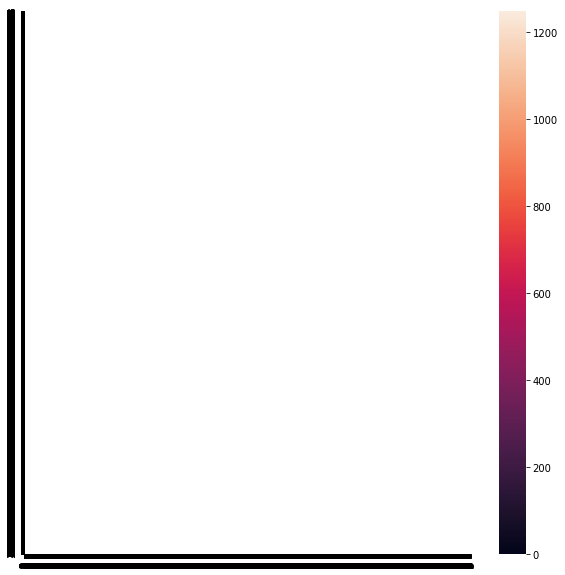

In [172]:
# very long time to run
'''
conf_mat = confusion_matrix(y_test2, y_pred_test)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=data.Rating.values, yticklabels=data.Rating.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
'''

In [ ]:
# Finding solution for over-fitting problem

In [174]:
# Don't run , takes 20-30 mins to run
# model_rf_new = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=1000, criterion='entropy', random_state=123, max_depth=30, max_features=4, min_samples_leaf=5)
model_rf2 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=1000, criterion='entropy', random_state=123, max_depth=30, min_samples_leaf=5)

model_rf2.fit(X_train2, y_train2)

# testing accuracy
y_pred_test = model_rf2.predict(X_test2)
accuracy_score(y_test2, y_pred_test)
print(classification_report(y_test2, y_pred_test))
print(confusion_matrix(y_test2, y_pred_test))

# training accuracy is 100% 
y_pred_train = model_rf2.predict(X_train2)
accuracy_score(y_train2, y_pred_train)
print(classification_report(y_train2, y_pred_train))

model_rf2.oob_score_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

0.4956430812129662

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.79      0.35      0.48       195
           2       0.50      0.01      0.02       250
           3       0.00      0.00      0.00       302
           4       0.41      0.08      0.14       835
           5       0.49      1.00      0.66      1287

    accuracy                           0.50      2869
   macro avg       0.44      0.29      0.26      2869
weighted avg       0.44      0.50      0.37      2869

[[  68    3    0    4  120]
 [  15    3    0   23  209]
 [   2    0    0   66  234]
 [   1    0    0   70  764]
 [   0    0    0    6 1281]]


0.6502527453372843

              precision    recall  f1-score   support

           1       0.96      0.58      0.73       782
           2       1.00      0.30      0.46       998
           3       1.00      0.08      0.15      1208
           4       0.82      0.44      0.57      3337
           5       0.58      1.00      0.74      5149

    accuracy                           0.65     11474
   macro avg       0.87      0.48      0.53     11474
weighted avg       0.76      0.65      0.60     11474



0.49023880076695137

### Neural Network - Keras

In [178]:
from keras.models import Sequential
from keras.layers import Dense

In [215]:
# Defining the structure for ANN network 
# 6885 Inputs -->  8 Hidden nodes ---> 5 outputs
def baseline_model():
    # creating the model
    model = Sequential() 
    model.add(Dense(8, input_dim=input_dim, activation='relu')) # input layer
    model.add(Dense(5, activation='softmax')) # # To define the dimensions for the output layer
    model.compile(loss="categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"]) # compile model- define loss function , optimizer, metrics
    return model 


In [216]:
# Fitting the model and evaluating training and testing accuracy
model.fit(X_train2, y_train2, epochs=100, batch_size=100, verbose=2)

loss, accuracy = model.evaluate(X_train2, y_train2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test2, y_test2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

# Training Accuracy: 0.0682
# Testing Accuracy:  0.0680

Epoch 1/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 2/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 3/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 4/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 5/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 6/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 7/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 8/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 9/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 10/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 11/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 12/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 13/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 14/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 15/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 16/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 17/100
 - 2s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 18/100
 - 2s - lo

Training Accuracy: 0.0682
Testing Accuracy:  0.0680


In [195]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=10, verbose=1)

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100)) # Baseline: 58.02% (0.92%)

Epoch 1/10
10326/10326 [==============================] - 3s 268us/step - loss: 1.2184 - accuracy: 0.4859
Epoch 2/10
10326/10326 [==============================] - 3s 257us/step - loss: 0.8461 - accuracy: 0.6544
Epoch 3/10
10326/10326 [==============================] - 3s 249us/step - loss: 0.6939 - accuracy: 0.7386
Epoch 4/10
10326/10326 [==============================] - 3s 244us/step - loss: 0.5907 - accuracy: 0.7915
Epoch 5/10
10326/10326 [==============================] - 3s 256us/step - loss: 0.5033 - accuracy: 0.8350
Epoch 6/10
10326/10326 [==============================] - 3s 244us/step - loss: 0.4268 - accuracy: 0.8704
Epoch 7/10
10326/10326 [==============================] - 3s 246us/step - loss: 0.3605 - accuracy: 0.8985
Epoch 8/10
10326/10326 [==============================] - 3s 254us/step - loss: 0.3018 - accuracy: 0.9206
Epoch 9/10
10326/10326 [==============================] - 3s 284us/step - loss: 0.2516 - accuracy: 0.9415
Epoch 10/10
1148/1148 [=======================

10327/10327 [==============================] - 3s 280us/step - loss: 0.6153 - accuracy: 0.7741
Epoch 5/10
10327/10327 [==============================] - 3s 282us/step - loss: 0.5387 - accuracy: 0.8129
Epoch 6/10
10327/10327 [==============================] - 3s 286us/step - loss: 0.4717 - accuracy: 0.8424
Epoch 7/10
10327/10327 [==============================] - 3s 301us/step - loss: 0.4125 - accuracy: 0.8742
Epoch 8/10
10327/10327 [==============================] - 3s 279us/step - loss: 0.3586 - accuracy: 0.8919
Epoch 9/10
10327/10327 [==============================] - 3s 312us/step - loss: 0.3099 - accuracy: 0.9160
Epoch 10/10
1147/1147 [==============================] - 0s 360us/step
Epoch 1/10
10327/10327 [==============================] - 3s 319us/step - loss: 1.1860 - accuracy: 0.4907
Epoch 2/10
10327/10327 [==============================] - 3s 266us/step - loss: 0.8550 - accuracy: 0.6468
Epoch 3/10
10327/10327 [==============================] - 3s 300us/step - loss: 0.7131 - acc

In [185]:
history = model.fit(X_train2, y_train2, epochs=100, batch_size=100,verbose=2)

loss, accuracy = model.evaluate(X_train2, y_train2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test2, y_test2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 2/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 3/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 4/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 5/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 6/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 7/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 8/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 9/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 10/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 11/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 12/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 13/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 14/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 15/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 16/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 17/100
 - 1s - loss: -4.7270e+01 - accuracy: 0.0682
Epoch 18/100
 - 1s - lo

In [211]:
# not mentioning optimizer, epochs and batch size, let model choose the best parameters
# Defining the structure for ANN network 
# 6885 Inputs -->  8 Hidden nodes ---> 5 outputs
def baseline_model2(optimizer):
    # creating the model
    model1 = Sequential() 
    model1.add(Dense(10, input_dim=input_dim, activation='relu')) # input layer
    model1.add(Dense(10, activation='relu')) # hidden  layer
    model1.add(Dense(5, activation='softmax')) # # To define the dimensions for the output layer
    model1.compile(loss="categorical_crossentropy",optimizer= optimizer,metrics = ["accuracy"]) # compile model- define loss function , optimizer, metrics
    return model1 



In [213]:
from sklearn.model_selection import GridSearchCV

classifier = KerasClassifier(build_fn = baseline_model2)

params = {'batch_size':[100,200], 'nb_epoch':[10,20],  'optimizer':['adam','rmsprop'] }

grid_search = GridSearchCV(estimator=classifier,  param_grid=params, scoring='accuracy', cv=10)
                                                     
grid_search = grid_search.fit(X_train2,y_train2)

best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/1
10326/10326 [==============================] - 2s 149us/step - loss: 1.4723 - accuracy: 0.43760s - loss: 1.4941 - accuracy
Epoch 1/1
10326/10326 [==============================] - 2s 159us/step - loss: 1.4654 - accuracy: 0.4444
Epoch 1/1
10326/10326 [==============================] - 2s 155us/step - loss: 1.4571 - accuracy: 0.4438
Epoch 1/1
10326/10326 [==============================] - 2s 152us/step - loss: 1.4793 - accuracy: 0.3267
Epoch 1/1
10327/10327 [==============================] - 2s 155us/step - loss: 1.3943 - accuracy: 0.4450
Epoch 1/1
10327/10327 [==============================] - 2s 158us/step - loss: 1.5114 - accuracy: 0.3134
Epoch 1/1
10327/10327 [==============================] - 2s 160us/step - loss: 1.4772 - accuracy: 0.3215
Epoch 1/1
10327/10327 [==============================] - 2s 160us/step - loss: 1.4521 - accuracy: 0.4408
Epoch 1/1
10327/10327 [==============================] - 2s 171us/step - loss: 1.3726 - accuracy: 0.4449
Epoch 1/1
10327/10327 [====

10327/10327 [==============================] - 2s 204us/step - loss: 1.4953 - accuracy: 0.4452
Epoch 1/1
10327/10327 [==============================] - 2s 206us/step - loss: 1.5264 - accuracy: 0.4390
Epoch 1/1
10327/10327 [==============================] - 2s 203us/step - loss: 1.5212 - accuracy: 0.4101
Epoch 1/1
10327/10327 [==============================] - 2s 202us/step - loss: 1.5374 - accuracy: 0.2895
Epoch 1/1
11474/11474 [==============================] - 3s 223us/step - loss: 1.5238 - accuracy: 0.4452


In [214]:
best_param
best_accuracy

{'batch_size': 100, 'nb_epoch': 20, 'optimizer': 'rmsprop'}

0.45127943218029765